# Exploration IEEE TEP Dataset

In this notebook we'll explore the TEP Simulation dataset, which can be accessed [here](https://dataverse.harvard.edu/dataset.xhtml?persistentId=doi:10.7910/DVN/6C3JR1).

[This](http://users.abo.fi/khaggblo/RS/Downs.pdf) is the original paper describing the dataset.


Quick note:
- I had to install R, doing: `sudo apt install r-base -y`

In [1]:
import os
os.chdir('..')

In [2]:
import pyreadr
import s3fs
import pandas as pd
import matplotlib.pyplot as plt
import pipeline.src.constants as const

In [3]:
# initiate minio client
s3 = s3fs.S3FileSystem(
    anon=False,
    use_ssl=False,
    client_kwargs={
        "endpoint_url": f'http://{os.environ["S3_ENDPOINT"]}',
        "aws_access_key_id": os.environ['AWS_ACCESS_KEY_ID'],
        "aws_secret_access_key": os.environ['AWS_SECRET_ACCESS_KEY']})

In [4]:
# constants
RAW_DATA_DIR = 'hs-bucket/diag-tcn-data/raw/TEP-KAGGLE'

In [11]:
len(const.COLUMNS)

52

In [5]:
# download files
for path in s3.ls(RAW_DATA_DIR):
    s3.get(path, './data/raw/TEP-KAGGLE/')

In [6]:
file_names = os.listdir('./data/raw/TEP-KAGGLE/')

In [7]:
file_names

['TEP_Faulty_Training.RData',
 'TEP_FaultFree_Training.RData',
 'TEP_Faulty_Testing.RData',
 'TEP_FaultFree_Testing.RData']

In [8]:
df_dct = {}
for f in file_names:
    result = pyreadr.read_r(f'./data/raw/TEP-KAGGLE/{f}')
    df_name = list(result.keys())[0]
    df_dct.update({df_name: pd.DataFrame(result[df_name])})
    print(result.keys())

odict_keys(['faulty_training'])
odict_keys(['fault_free_training'])
odict_keys(['faulty_testing'])
odict_keys(['fault_free_testing'])


In [22]:
df_faulty_training = df_dct['faulty_training']
df_faulty_testing = df_dct['faulty_testing']
df_fault_free_training = df_dct['fault_free_training']
df_fault_free_testing = df_dct['fault_free_testing']

In [39]:

# split correct samples from faulty testing
df_faulty_testing = df_faulty_testing[
    (df_faulty_testing["sample"] > 160)
    & (df_faulty_testing["sample"] <= (160 + 480))
].reset_index(drop=True)

In [40]:
df_faulty_testing.simulationRun.value_counts()

1.0      9600
330.0    9600
343.0    9600
342.0    9600
341.0    9600
         ... 
162.0    9600
161.0    9600
160.0    9600
159.0    9600
500.0    9600
Name: simulationRun, Length: 500, dtype: int64

In [45]:
df_faulty_testing["simulationRunNEW"] = [
        i+(500 * 20) for i in range(1, 500 * 20 + 1) for _ in range(480)
    ]

In [10]:
df_faulty_training.head()

,faultNumber,simulationRun,sample,xmeas_1,xmeas_2,xmeas_3,xmeas_4,xmeas_5,xmeas_6,xmeas_7,...,xmv_2,xmv_3,xmv_4,xmv_5,xmv_6,xmv_7,xmv_8,xmv_9,xmv_10,xmv_11
0,1,1.0,1,0.25038,3674.0,4529.0,9.2320,26.889,42.402,2704.3,...,53.744,24.657,62.544,22.137,39.935,42.323,47.757,47.510,41.258,18.447
1,1,1.0,2,0.25109,3659.4,4556.6,9.4264,26.721,42.576,2705.0,...,53.414,24.588,59.259,22.084,40.176,38.554,43.692,47.427,41.359,17.194
2,1,1.0,3,0.25038,3660.3,4477.8,9.4426,26.875,42.070,2706.2,...,54.357,24.666,61.275,22.380,40.244,38.990,46.699,47.468,41.199,20.530
3,1,1.0,4,0.24977,3661.3,4512.1,9.4776,26.758,42.063,2707.2,...,53.946,24.725,59.856,22.277,40.257,38.072,47.541,47.658,41.643,18.089
4,1,1.0,5,0.29405,3679.0,4497.0,9.3381,26.889,42.650,2705.1,...,53.658,28.797,60.717,21.947,39.144,41.955,47.645,47.346,41.507,18.461


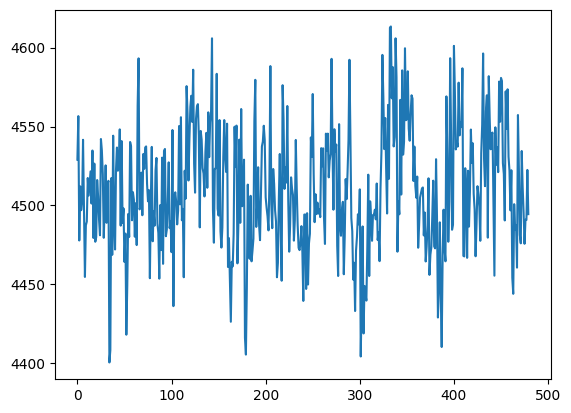

In [11]:
plt.plot(df_fault_free_training[df_fault_free_training.simulationRun==1]['xmeas_3'][0:480])

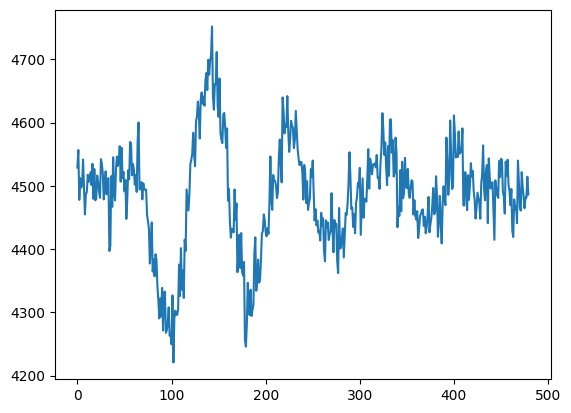

In [12]:
plt.plot(df_faulty_training[df_faulty_training.simulationRun==1]['xmeas_3'][0:480])

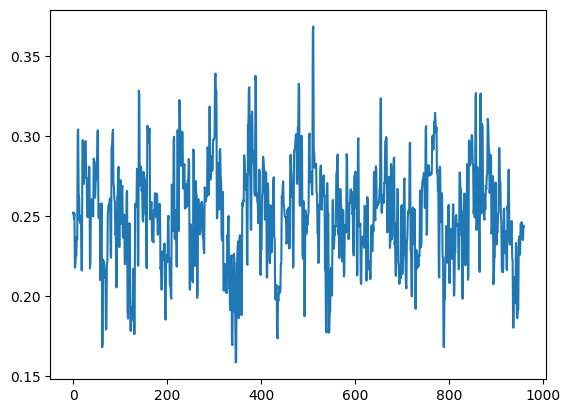

In [13]:
plt.plot(df_fault_free_testing[df_fault_free_testing.simulationRun==1]['xmeas_1'][0:1080])

## Datasets

Idea:

- we use sample size 480 (for pragmatic reasons)
- we take all the data from fault free training and testing and compine them to one larger dataset
- in each simulation run for testing (fault free) we can get two samples (because of longer simulation runs)
- 

In [48]:
df_faulty_testing.simulationRun.value_counts()

1.0      19200
330.0    19200
343.0    19200
342.0    19200
341.0    19200
         ...  
162.0    19200
161.0    19200
160.0    19200
159.0    19200
500.0    19200
Name: simulationRun, Length: 500, dtype: int64

In [49]:
df_faulty_testing.head()

,faultNumber,simulationRun,sample,xmeas_1,xmeas_2,xmeas_3,xmeas_4,xmeas_5,xmeas_6,xmeas_7,...,xmv_2,xmv_3,xmv_4,xmv_5,xmv_6,xmv_7,xmv_8,xmv_9,xmv_10,xmv_11
0,1,1.0,1,0.25171,3672.4,4466.3,9.5122,27.057,42.473,2705.6,...,54.494,24.527,59.710,22.357,40.149,40.074,47.955,47.300,42.100,15.345
1,1,1.0,2,0.25234,3642.2,4568.7,9.4145,26.999,42.586,2705.2,...,53.269,24.465,60.466,22.413,39.956,36.651,45.038,47.502,40.553,16.063
2,1,1.0,3,0.24840,3643.1,4507.5,9.2901,26.927,42.278,2703.5,...,54.000,24.860,60.642,22.199,40.074,41.868,44.553,47.479,41.341,20.452
3,1,1.0,4,0.25153,3628.3,4519.3,9.3347,26.999,42.330,2703.9,...,53.860,24.553,61.908,21.981,40.141,40.066,48.048,47.440,40.780,17.123
4,1,1.0,5,0.21763,3655.8,4571.0,9.3087,26.901,42.402,2707.7,...,53.307,21.775,61.891,22.412,37.696,38.295,44.678,47.530,41.089,18.681


In [16]:
df_fault_free_testing.simulationRun.value_counts()

1.0      960
330.0    960
343.0    960
342.0    960
341.0    960
        ... 
162.0    960
161.0    960
160.0    960
159.0    960
500.0    960
Name: simulationRun, Length: 500, dtype: int64

In [27]:
len([i for i in range(1, 3) for _ in range(5)])

10

In [38]:
df_fault_free_testing['sample'] = list(range(1, 481))*500*2
df_fault_free_testing['simulationRun'] = [i+500 for i in range(1, 1001) for _ in range(480)]

In [39]:
df_fault_free_testing[475:490]

,faultNumber,simulationRun,sample,xmeas_1,xmeas_2,xmeas_3,xmeas_4,xmeas_5,xmeas_6,xmeas_7,...,xmv_2,xmv_3,xmv_4,xmv_5,xmv_6,xmv_7,xmv_8,xmv_9,xmv_10,xmv_11
475,0,501,476,0.30086,3649.7,4451.0,9.3602,26.532,42.333,2704.3,...,54.303,30.015,60.535,21.844,38.105,39.931,46.994,46.356,40.292,18.927
476,0,501,477,0.27044,3712.6,4552.9,9.2712,27.368,42.469,2702.6,...,54.394,26.529,61.348,22.316,39.382,37.626,51.076,46.267,40.961,18.532
477,0,501,478,0.27012,3662.1,4551.9,9.3907,26.899,42.132,2703.9,...,54.406,26.561,58.641,22.353,39.175,40.366,48.982,46.445,40.623,15.680
478,0,501,479,0.30545,3648.1,4528.4,9.2184,27.372,42.358,2704.5,...,53.908,29.976,60.539,21.939,39.435,41.291,48.220,46.523,41.241,20.315
479,0,501,480,0.30424,3645.5,4524.9,9.3381,26.735,42.155,2706.3,...,53.950,30.094,59.825,21.884,39.778,33.167,44.426,46.692,41.027,18.392
480,0,502,1,0.33279,3656.6,4472.2,9.3117,26.621,42.532,2706.4,...,53.950,32.218,60.793,22.185,37.574,39.445,40.451,47.053,41.000,16.745
481,0,502,2,0.33051,3652.4,4480.4,9.2499,26.776,42.490,2704.2,...,53.852,32.442,61.879,21.868,37.996,37.461,46.177,47.278,41.173,16.087
482,0,502,3,0.25747,3672.7,4505.9,9.3967,27.048,42.353,2701.4,...,54.353,25.154,60.204,21.863,40.715,37.511,47.599,47.395,41.191,20.746
483,0,502,4,0.25634,3655.9,4514.4,9.2974,26.966,42.218,2700.0,...,54.251,25.265,62.291,22.077,40.939,32.152,46.503,47.597,41.154,16.690
484,0,502,5,0.25884,3702.0,4481.5,9.4089,26.876,42.326,2701.9,...,53.459,25.904,60.486,22.288,39.754,37.573,43.823,47.706,41.919,16.264


In [18]:
df_fault_free_testing.head()

,faultNumber,simulationRun,sample,xmeas_1,xmeas_2,xmeas_3,xmeas_4,xmeas_5,xmeas_6,xmeas_7,...,xmv_2,xmv_3,xmv_4,xmv_5,xmv_6,xmv_7,xmv_8,xmv_9,xmv_10,xmv_11
0,0,1.0,1,0.25171,3672.4,4466.3,9.5122,27.057,42.473,2705.6,...,54.494,24.527,59.710,22.357,40.149,40.074,47.955,47.300,42.100,15.345
1,0,1.0,2,0.25234,3642.2,4568.7,9.4145,26.999,42.586,2705.2,...,53.269,24.465,60.466,22.413,39.956,36.651,45.038,47.502,40.553,16.063
2,0,1.0,3,0.24840,3643.1,4507.5,9.2901,26.927,42.278,2703.5,...,54.000,24.860,60.642,22.199,40.074,41.868,44.553,47.479,41.341,20.452
3,0,1.0,4,0.25153,3628.3,4519.3,9.3347,26.999,42.330,2703.9,...,53.860,24.553,61.908,21.981,40.141,40.066,48.048,47.440,40.780,17.123
4,0,1.0,5,0.21763,3655.8,4571.0,9.3087,26.901,42.402,2707.7,...,53.307,21.775,61.891,22.412,37.696,38.295,44.678,47.530,41.089,18.681


In [19]:
df_faulty_training.faultNumber.unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20], dtype=int32)

In [20]:
df_faulty_training['sample'].value_counts()

1      10000
330    10000
343    10000
342    10000
341    10000
       ...  
162    10000
161    10000
160    10000
159    10000
500    10000
Name: sample, Length: 500, dtype: int64

In [21]:
df_faulty_testing.faultNumber.unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20], dtype=int32)

In [22]:
df_faulty_testing['sample'].value_counts()

1      10000
2      10000
633    10000
634    10000
635    10000
       ...  
325    10000
326    10000
327    10000
328    10000
960    10000
Name: sample, Length: 960, dtype: int64

In [40]:
df_fault_free_training = df_fault_free_training[df_fault_free_training['sample'] <481].reset_index(drop=True)

In [24]:
df_fault_free_training[470:490]

,faultNumber,simulationRun,sample,xmeas_1,xmeas_2,xmeas_3,xmeas_4,xmeas_5,xmeas_6,xmeas_7,...,xmv_2,xmv_3,xmv_4,xmv_5,xmv_6,xmv_7,xmv_8,xmv_9,xmv_10,xmv_11
470,0.0,1.0,471,0.24432,3646.1,4481.3,9.1794,26.671,42.145,2701.0,...,53.583,23.986,62.690,21.887,43.971,32.875,44.674,47.466,40.746,19.053
471,0.0,1.0,472,0.24381,3637.4,4476.0,9.3966,26.742,41.924,2698.9,...,53.647,24.036,57.813,21.930,44.231,39.181,45.289,47.607,40.442,19.193
472,0.0,1.0,473,0.24250,3677.1,4534.5,9.2527,26.467,42.391,2700.6,...,54.807,23.675,63.663,21.619,38.317,40.458,43.662,47.736,41.052,15.763
473,0.0,1.0,474,0.24086,3690.6,4511.7,9.4535,26.819,42.288,2703.8,...,55.080,23.837,60.268,21.844,38.024,43.717,43.433,47.976,41.194,18.989
474,0.0,1.0,475,0.28935,3659.1,4495.7,9.3454,27.106,42.366,2704.2,...,53.605,28.286,60.591,21.457,40.253,38.499,48.182,48.437,41.055,17.297
475,0.0,1.0,476,0.28605,3672.5,4475.7,9.2976,27.001,42.312,2702.5,...,53.845,28.611,60.206,21.540,40.425,39.350,52.022,48.042,40.887,15.753
476,0.0,1.0,477,0.25993,3654.3,4491.0,9.2212,26.938,42.571,2700.8,...,53.710,25.719,61.534,21.662,42.393,37.842,44.617,47.738,41.492,18.755
477,0.0,1.0,478,0.26192,3657.6,4490.8,9.3963,27.117,42.490,2700.8,...,53.713,25.523,58.577,21.749,42.267,36.408,43.744,47.723,40.759,16.931
478,0.0,1.0,479,0.27800,3644.0,4522.5,9.3267,27.107,42.323,2700.4,...,53.954,27.149,61.660,21.896,40.149,41.716,47.372,47.712,41.687,17.506
479,0.0,1.0,480,0.27904,3642.3,4494.5,9.2464,27.047,42.709,2701.3,...,54.289,27.047,60.772,21.664,40.586,33.382,46.030,47.775,39.977,18.638


In [28]:
df_fault_free_training.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240000 entries, 0 to 239999
Data columns (total 55 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   faultNumber    240000 non-null  float64
 1   simulationRun  240000 non-null  float64
 2   sample         240000 non-null  int32  
 3   xmeas_1        240000 non-null  float64
 4   xmeas_2        240000 non-null  float64
 5   xmeas_3        240000 non-null  float64
 6   xmeas_4        240000 non-null  float64
 7   xmeas_5        240000 non-null  float64
 8   xmeas_6        240000 non-null  float64
 9   xmeas_7        240000 non-null  float64
 10  xmeas_8        240000 non-null  float64
 11  xmeas_9        240000 non-null  float64
 12  xmeas_10       240000 non-null  float64
 13  xmeas_11       240000 non-null  float64
 14  xmeas_12       240000 non-null  float64
 15  xmeas_13       240000 non-null  float64
 16  xmeas_14       240000 non-null  float64
 17  xmeas_15       240000 non-nul

In [41]:
df_fault_free = pd.concat((df_fault_free_training, df_fault_free_testing), axis=0).reset_index(drop=True)

In [44]:
df_fault_free.simulationRun.value_counts()[490:503]

490.0    480
489.0    480
488.0    480
487.0    480
486.0    480
485.0    480
484.0    480
483.0    480
482.0    480
481.0    480
480.0    480
479.0    480
478.0    480
477.0    480
476.0    480
475.0    480
474.0    480
473.0    480
472.0    480
491.0    480
493.0    480
514.0    480
494.0    480
513.0    480
512.0    480
511.0    480
510.0    480
509.0    480
508.0    480
507.0    480
506.0    480
505.0    480
504.0    480
503.0    480
Name: simulationRun, dtype: int64

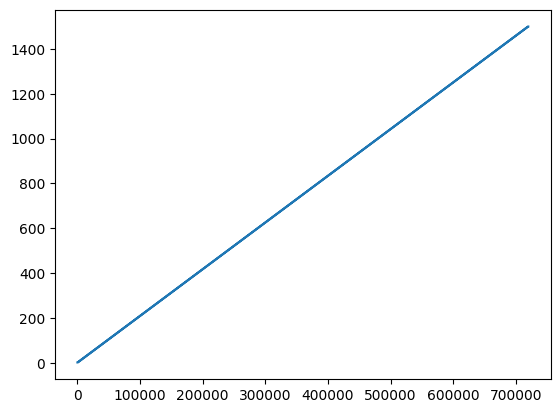

In [47]:
plt.plot(df_fault_free.simulationRun)

In [63]:
df_fault_free_testing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 480000 entries, 0 to 479999
Data columns (total 56 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   faultNumber    480000 non-null  int32  
 1   simulationRun  480000 non-null  float64
 2   sample         480000 non-null  int64  
 3   xmeas_1        480000 non-null  float64
 4   xmeas_2        480000 non-null  float64
 5   xmeas_3        480000 non-null  float64
 6   xmeas_4        480000 non-null  float64
 7   xmeas_5        480000 non-null  float64
 8   xmeas_6        480000 non-null  float64
 9   xmeas_7        480000 non-null  float64
 10  xmeas_8        480000 non-null  float64
 11  xmeas_9        480000 non-null  float64
 12  xmeas_10       480000 non-null  float64
 13  xmeas_11       480000 non-null  float64
 14  xmeas_12       480000 non-null  float64
 15  xmeas_13       480000 non-null  float64
 16  xmeas_14       480000 non-null  float64
 17  xmeas_15       480000 non-nul

## Test dataste

- wir haben ein sample alle drei minuten
- im faulty trianng werden die anomalien nach 1h (20 samples) und in test nach 8h (160 samples) introduced
- für training (orig) nehmen wir einfach die samples 20:500 und haben also wieder unsere tensor size die wir für das modell brauchen
- für test nehmen wir einfach die samples 160: 160+480

In [64]:
df_fault_free_testing.simulationRun.max()

1500

In [63]:
df_faulty_testing[(df_faulty_testing['sample']>160) & (df_faulty_testing['sample']<=(160+480))].reset_index(drop=True)[470:490]

,faultNumber,simulationRun,sample,xmeas_1,xmeas_2,xmeas_3,xmeas_4,xmeas_5,xmeas_6,xmeas_7,...,xmv_2,xmv_3,xmv_4,xmv_5,xmv_6,xmv_7,xmv_8,xmv_9,xmv_10,xmv_11
470,1,1.0,631,0.72143,3656.3,4577.5,8.7284,26.868,41.800,2711.1,...,53.671,71.242,57.316,22.652,38.220,36.476,45.453,55.604,41.019,17.688
471,1,1.0,632,0.72465,3652.8,4558.0,8.7871,26.663,42.493,2708.0,...,53.904,70.926,57.894,22.331,38.281,39.121,47.126,55.524,40.675,17.233
472,1,1.0,633,0.71568,3678.7,4538.8,8.7748,26.948,42.364,2708.9,...,54.349,70.626,58.200,22.388,36.878,37.248,45.731,55.418,41.038,16.898
473,1,1.0,634,0.71655,3688.9,4529.5,8.6546,26.600,42.172,2707.0,...,54.459,70.540,58.045,22.348,37.278,43.790,44.665,55.323,41.667,17.631
474,1,1.0,635,0.74985,3620.0,4542.4,8.7353,26.882,41.916,2706.8,...,53.862,74.068,56.894,22.174,36.182,39.281,47.575,55.146,40.705,16.003
475,1,1.0,636,0.75162,3575.0,4505.5,8.7600,26.965,42.325,2709.0,...,54.304,73.894,55.329,22.297,36.190,40.618,47.287,54.695,40.562,18.647
476,1,1.0,637,0.73770,3697.4,4451.4,8.7265,27.064,42.141,2708.9,...,53.686,72.604,57.886,22.607,37.813,37.179,47.650,54.625,40.933,19.092
477,1,1.0,638,0.73784,3731.4,4494.8,8.7570,26.671,42.173,2704.1,...,53.166,72.590,58.253,21.840,37.578,35.967,47.587,54.251,40.804,17.850
478,1,1.0,639,0.75671,3626.7,4513.6,8.7806,26.699,42.458,2704.0,...,53.760,74.140,55.986,22.134,37.572,33.269,43.167,54.204,40.189,18.434
479,1,1.0,640,0.75254,3638.9,4455.7,8.6225,27.355,42.053,2701.7,...,54.454,74.551,58.666,22.016,37.967,43.459,49.701,53.697,40.433,17.118


In [53]:
df_faulty_training[df_faulty_training['sample']>20][470:510]

,faultNumber,simulationRun,sample,xmeas_1,xmeas_2,xmeas_3,xmeas_4,xmeas_5,xmeas_6,xmeas_7,...,xmv_2,xmv_3,xmv_4,xmv_5,xmv_6,xmv_7,xmv_8,xmv_9,xmv_10,xmv_11
490,1,1.0,491,0.74998,3679.4,4482.1,8.7226,26.755,42.603,2707.3,...,53.566,73.627,57.941,22.494,38.730,38.500,47.217,59.815,41.473,19.231
491,1,1.0,492,0.74836,3712.4,4474.3,8.8485,26.721,42.478,2705.3,...,53.659,73.786,57.926,22.043,39.133,40.823,48.649,59.716,42.256,18.112
492,1,1.0,493,0.78601,3635.0,4440.8,9.0084,26.784,42.067,2703.6,...,54.680,77.144,57.822,22.049,39.486,34.245,44.978,59.526,41.405,18.692
493,1,1.0,494,0.78511,3695.8,4492.7,8.8317,26.769,42.444,2700.7,...,54.059,77.233,57.485,21.961,39.831,41.925,49.737,59.569,41.203,14.602
494,1,1.0,495,0.74379,3636.3,4485.0,8.8306,26.951,41.934,2704.8,...,54.168,72.982,56.347,22.723,36.627,39.894,45.588,59.331,41.657,18.754
495,1,1.0,496,0.74559,3647.8,4496.2,8.9127,26.599,42.246,2707.2,...,54.033,72.805,55.919,22.553,36.582,33.413,45.081,59.867,40.954,16.382
496,1,1.0,497,0.73589,3658.5,4520.1,8.7830,26.871,42.367,2703.9,...,53.916,72.091,56.887,22.284,40.616,37.943,42.518,59.935,41.230,17.373
497,1,1.0,498,0.73200,3651.9,4483.7,8.7352,26.919,42.468,2699.8,...,54.353,72.473,58.412,21.659,40.128,40.946,46.667,59.835,41.161,18.255
498,1,1.0,499,0.74578,3627.7,4510.9,8.8276,26.955,42.249,2701.2,...,54.405,72.880,59.465,22.658,37.214,37.825,47.355,59.927,40.436,19.142
499,1,1.0,500,0.74273,3624.9,4555.6,8.9419,27.219,42.688,2702.9,...,53.869,73.180,55.845,22.723,37.696,37.913,52.266,60.228,41.017,18.975


Fragen:
- sind in den testing und training daten die selben daten (zu beginn der phase)
- Ich trainiere ja nur auf healthy daten. sollte ich testing und training zusammenschmeißen und meinen eigenen split machen?

# Subsystem-signals map (deducted from original paper)

In [49]:
## let
subsystem_signals_map = {
    'InputFeed': ['xmeas_1', 'xmeas_2', 'xmeas_3', 'xmeas_4', 'xmeas_5'],
    'Reactor': ['xmeas_6', 'xmeas_7', 'xmeas_8', 'xmeas_9', 'xmeas_21'],
    'Purge': ['xmeas_10'],
    'ProductSeparator': ['xmeas_11', 'xmeas_12', 'xmeas_13', 'xmeas_14', 'xmeas_22'],
    'Stripper': ['xmeas_15', 'xmeas_16', 'xmeas_17', 'xmeas_18', 'xmeas_19'],
    'Compressor': ['xmeas_20'],
    'ReactorFeed': ['xmeas_23', 'xmeas_24', 'xmeas_25', 'xmeas_26', 'xmeas_27', 'xmeas_28'],
    'PurgeGas': ['xmeas_29', 'xmeas_30', 'xmeas_31', 'xmeas_32', 'xmeas_33', 'xmeas_34', 'xmeas_35', 'xmeas_36'],
    'Product': ['xmeas_37', 'xmeas_38', 'xmeas_39', 'xmeas_40', 'xmeas_41']
}

In [ ]:
## 

# Expected Symptoms for faults from original paper


In [50]:
subsystem_signals_map

{'InputFeed': ['xmeas_1', 'xmeas_2', 'xmeas_3', 'xmeas_4', 'xmeas_5'],
 'Reactor': ['xmeas_6', 'xmeas_7', 'xmeas_8', 'xmeas_9', 'xmeas_21'],
 'Purge': ['xmeas_10'],
 'ProductSeparator': ['xmeas_11',
  'xmeas_12',
  'xmeas_13',
  'xmeas_14',
  'xmeas_22'],
 'Stripper': ['xmeas_15', 'xmeas_16', 'xmeas_17', 'xmeas_18', 'xmeas_19'],
 'Compressor': ['xmeas_20'],
 'ReactorFeed': ['xmeas_23',
  'xmeas_24',
  'xmeas_25',
  'xmeas_26',
  'xmeas_27',
  'xmeas_28'],
 'PurgeGas': ['xmeas_29',
  'xmeas_30',
  'xmeas_31',
  'xmeas_32',
  'xmeas_33',
  'xmeas_34',
  'xmeas_35',
  'xmeas_36'],
 'Product': ['xmeas_37', 'xmeas_38', 'xmeas_39', 'xmeas_40', 'xmeas_41']}

## explore preproc output


In [3]:
df_train = pd.read_parquet('data/tmp/df_training.parquet')
df_val = pd.read_parquet('data/tmp/df_validation.parquet')
df_test = pd.read_parquet('data/tmp/df_test.parquet')

In [5]:
sim_run_ls = list(df_train.simulationRun.unique())

In [9]:
import numpy as np
df_train[df_train.simulationRun == sim_run_ls[0]][const.columns].values.astype(np.float32)

array([[2.5038e-01, 3.6740e+03, 4.5290e+03, ..., 4.7510e+01, 4.1258e+01,
        1.8447e+01],
       [2.5109e-01, 3.6594e+03, 4.5566e+03, ..., 4.7427e+01, 4.1359e+01,
        1.7194e+01],
       [2.5038e-01, 3.6603e+03, 4.4778e+03, ..., 4.7468e+01, 4.1199e+01,
        2.0530e+01],
       ...,
       [2.6192e-01, 3.6576e+03, 4.4908e+03, ..., 4.7723e+01, 4.0759e+01,
        1.6931e+01],
       [2.7800e-01, 3.6440e+03, 4.5225e+03, ..., 4.7712e+01, 4.1687e+01,
        1.7506e+01],
       [2.7904e-01, 3.6423e+03, 4.4945e+03, ..., 4.7775e+01, 3.9977e+01,
        1.8638e+01]], dtype=float32)

In [10]:
df_train[df_train.simulationRun == list(df_train.simulationRun.unique())[1]]

,faultNumber,simulationRun,sample,xmeas_1,xmeas_2,xmeas_3,xmeas_4,xmeas_5,xmeas_6,xmeas_7,...,xmv_2,xmv_3,xmv_4,xmv_5,xmv_6,xmv_7,xmv_8,xmv_9,xmv_10,xmv_11
480,0.0,2.0,1,0.25225,3683.6,4499.5,9.3306,26.713,42.420,2706.4,...,54.098,24.474,62.513,22.178,39.661,42.864,46.936,47.381,41.427,15.683
481,0.0,2.0,2,0.25152,3652.7,4525.4,9.4291,27.060,41.890,2706.0,...,53.788,24.545,60.970,22.330,40.111,35.144,48.475,47.491,41.424,20.233
482,0.0,2.0,3,0.24869,3650.6,4521.8,9.3850,26.916,42.299,2704.9,...,53.830,24.832,62.244,22.113,40.211,35.244,45.472,47.585,41.398,18.516
483,0.0,2.0,4,0.25210,3669.4,4524.2,9.2763,26.979,42.034,2705.6,...,53.801,24.496,60.941,22.329,39.792,37.231,46.608,47.459,40.662,17.868
484,0.0,2.0,5,0.24039,3660.0,4581.0,9.3955,26.895,42.069,2705.4,...,54.370,23.190,61.190,22.321,40.162,38.833,45.716,47.556,41.222,17.939
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
955,0.0,2.0,476,0.23407,3641.2,4476.6,9.4122,26.427,42.392,2708.5,...,52.933,23.183,61.422,22.778,36.921,38.446,46.401,52.483,40.937,18.907
956,0.0,2.0,477,0.29175,3725.3,4467.4,9.4010,27.180,42.488,2708.5,...,54.162,28.664,62.566,22.866,40.356,36.500,43.506,52.522,41.429,19.403
957,0.0,2.0,478,0.28974,3758.3,4515.9,9.4662,26.803,42.222,2709.3,...,53.582,28.861,60.538,23.221,40.666,42.826,48.883,53.036,42.224,21.338
958,0.0,2.0,479,0.27143,3651.9,4455.8,9.4119,26.682,42.461,2707.8,...,53.380,26.911,61.701,22.687,39.323,40.160,45.684,53.062,41.234,17.842


In [70]:
columns = ['xmeas_1', 'xmeas_2',
       'xmeas_3', 'xmeas_4', 'xmeas_5', 'xmeas_6', 'xmeas_7', 'xmeas_8',
       'xmeas_9', 'xmeas_10', 'xmeas_11', 'xmeas_12', 'xmeas_13', 'xmeas_14',
       'xmeas_15', 'xmeas_16', 'xmeas_17', 'xmeas_18', 'xmeas_19', 'xmeas_20',
       'xmeas_21', 'xmeas_22', 'xmeas_23', 'xmeas_24', 'xmeas_25', 'xmeas_26',
       'xmeas_27', 'xmeas_28', 'xmeas_29', 'xmeas_30', 'xmeas_31', 'xmeas_32',
       'xmeas_33', 'xmeas_34', 'xmeas_35', 'xmeas_36', 'xmeas_37', 'xmeas_38',
       'xmeas_39', 'xmeas_40', 'xmeas_41', 'xmv_1', 'xmv_2', 'xmv_3', 'xmv_4',
       'xmv_5', 'xmv_6', 'xmv_7', 'xmv_8', 'xmv_9', 'xmv_10', 'xmv_11']

In [ ]:
col

In [69]:
df_train.columns

Index(['faultNumber', 'simulationRun', 'sample', 'xmeas_1', 'xmeas_2',
       'xmeas_3', 'xmeas_4', 'xmeas_5', 'xmeas_6', 'xmeas_7', 'xmeas_8',
       'xmeas_9', 'xmeas_10', 'xmeas_11', 'xmeas_12', 'xmeas_13', 'xmeas_14',
       'xmeas_15', 'xmeas_16', 'xmeas_17', 'xmeas_18', 'xmeas_19', 'xmeas_20',
       'xmeas_21', 'xmeas_22', 'xmeas_23', 'xmeas_24', 'xmeas_25', 'xmeas_26',
       'xmeas_27', 'xmeas_28', 'xmeas_29', 'xmeas_30', 'xmeas_31', 'xmeas_32',
       'xmeas_33', 'xmeas_34', 'xmeas_35', 'xmeas_36', 'xmeas_37', 'xmeas_38',
       'xmeas_39', 'xmeas_40', 'xmeas_41', 'xmv_1', 'xmv_2', 'xmv_3', 'xmv_4',
       'xmv_5', 'xmv_6', 'xmv_7', 'xmv_8', 'xmv_9', 'xmv_10', 'xmv_11'],
      dtype='object')

In [61]:
df_train.simulationRun.value_counts().sort_values()

1.0       480
5.0       480
6.0       480
7.0       480
8.0       480
         ... 
1349.0    480
1332.0    480
1310.0    480
1343.0    480
1350.0    480
Name: simulationRun, Length: 1350, dtype: int64

In [62]:
df_val.simulationRun.value_counts().sort_values()

1351.0    480
1368.0    480
1353.0    480
1354.0    480
1355.0    480
         ... 
1496.0    480
1497.0    480
1498.0    480
1484.0    480
1500.0    480
Name: simulationRun, Length: 150, dtype: int64

In [55]:
df_test.simulationRun.unique()

array([    1,     2,     3, ..., 19998, 19999, 20000])

In [59]:
df_test[df_test.faultNumber == 1].simulationRun.value_counts()

1        480
13421    480
13161    480
13181    480
13201    480
        ... 
6761     480
6781     480
6801     480
6821     480
19981    480
Name: simulationRun, Length: 1000, dtype: int64

In [6]:
s3.ls('/')

['eclss-data', 'hs-bucket', 'mlpipeline', 'st-bucket']

In [ ]:
s3.mou